<a href="https://colab.research.google.com/github/nishantruwari/projects/blob/main/mnist%20project%20NN%20from%20Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# data = pd.read_csv('/content/mnist_train.csv')

In [ ]:

train_data = pd.read_csv('/content/mnist_train.csv')  # Use pd.read_csv to create a DataFrame
test_data = pd.read_csv('/content/mnist_test.csv')    # Use pd.read_csv to create a DataFrame



In [ ]:
test_data.head()

,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 783
dtypes: int64(785)
memory usage: 359.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 783
dtypes: int64(785)
memory usage: 59.9 MB


In [ ]:
# Split training data
Y_train = train_data.iloc[:, 0].values               # First column is labels
X_train = train_data.iloc[:, 1:].values / 255.0      # Normalize pixel values (0-255 -> 0-1)

# Split test data
Y_test = test_data.iloc[:, 0].values                 # First column
X_test = test_data.iloc[:, 1:].values / 255.0        # Normalize pixel values

In [ ]:
# Transpose for training data
X_train = X_train.T  # Shape: (784, m_train)
Y_train = Y_train.reshape(1, -1)  # Shape: (1, m_train)

# Transpose for test data
X_test = X_test.T    # Shape: (784, m_test)
Y_test = Y_test.reshape(1, -1)    # Shape: (1, m_test)


In [ ]:
X_train[0].shape

(60000,)

In [ ]:
Y_train

array([[5, 0, 4, ..., 5, 6, 8]])

In [ ]:
def init_params():
    W1 = np.random.randn(128, 784) * 0.01  # 128 neurons in the first hidden layer
    b1 = np.zeros((128, 1))
    W2 = np.random.randn(64, 128) * 0.01  # 64 neurons in the second hidden layer
    b2 = np.zeros((64, 1))
    W3 = np.random.randn(10, 64) * 0.01   # 10 outputs (one for each digit)
    b3 = np.zeros((10, 1))
    return W1, b1, W2, b2, W3, b3

In [ ]:
#  Gaussian-shaped function
def GSF(x):
    return np.where(x > 0, x * np.exp(-x**2), 0)


def GSF_deriv(x):
    return np.where(x > 0, (1 - 2 * x**2) * np.exp(-x**2), 0)


In [ ]:
# # Name: Exponential Logistic Activation (ExLog)
def ExLog(x):
    return x / (1 + np.exp(-np.abs(x)))

def ExLog_deriv(x):
    abs_x = np.abs(x)
    exp_term = np.exp(-abs_x)
    return 1 / (1 + exp_term) + (abs_x * exp_term) / (1 + exp_term) ** 2 * np.sign(x)

In [ ]:
# # Gaussian Error Linear Unit (GELU) activation function.

def GELU(x):
    """
    Gaussian Error Linear Unit (GELU) activation function.
    :param x: Input array.
    :return: GELU activation values.
    """
    cdf_approx = 0.5 * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))
    return x * cdf_approx

def GELU_deriv(x):
    """
    Derivative of the GELU activation function.
    :param x: Input array.
    :return: Derivative values of GELU.
    """
    sqrt_2_pi = np.sqrt(2 / np.pi)
    cdf_approx = 0.5 * (1 + np.tanh(sqrt_2_pi * (x + 0.044715 * x**3)))
    pdf_approx = sqrt_2_pi * (1 + 3 * 0.044715 * x**2) * (1 - np.tanh(sqrt_2_pi * (x + 0.044715 * x**3))**2)
    return cdf_approx + x * pdf_approx

In [ ]:
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_deriv(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))  # Avoid overflow
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

def forward_prop_with_GSF(W1, b1, W2, b2, W3, b3, X):

    Z1 = W1.dot(X) + b1
    A1 = GSF(Z1)  # Using Leaky GSF here
    Z2 = W2.dot(A1) + b2
    A2 = GSF(Z2)  # Second hidden layer with Leaky ReLU
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)     # Output layer
    return Z1, A1, Z2, A2, Z3, A3

def forward_prop_with_ExLog(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ExLog(Z1)  # Using Leaky ExLog here
    Z2 = W2.dot(A1) + b2
    A2 = ExLog(Z2)  # Second hidden layer with Leaky ReLU
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)     # Output layer
    return Z1, A1, Z2, A2, Z3, A3

def forward_prop_with_GELU(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = GELU(Z1)  # Using Leaky GELU here
    Z2 = W2.dot(A1) + b2
    A2 = GELU(Z2)  # Second hidden layer with Leaky ReLU
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)     # Output layer
    return Z1, A1, Z2, A2, Z3, A3

def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = leaky_relu(Z1)  # Using Leaky ReLU here
    Z2 = W2.dot(A1) + b2
    A2 = leaky_relu(Z2)  # Second hidden layer with Leaky ReLU
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)     # Output layer
    return Z1, A1, Z2, A2, Z3, A3


def one_hot(Y):
    # Ensure Y contains integers by casting to int
    Y = Y.astype(int)
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
#############################################


def backward_prop_with_GSF(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y, m_train):
    one_hot_Y = one_hot(Y)

    # Compute derivatives for output layer
    dZ3 = A3 - one_hot_Y
    dW3 = (1 / m_train) * dZ3.dot(A2.T)
    db3 = (1 / m_train) * np.sum(dZ3, axis=1, keepdims=True)

    # Compute derivatives for second hidden layer
    dZ2 = W3.T.dot(dZ3) * GSF_deriv(Z2)
    dW2 = (1 / m_train) * dZ2.dot(A1.T)
    db2 = (1 / m_train) * np.sum(dZ2, axis=1, keepdims=True)

    # Compute derivatives for first hidden layer
    dZ1 = W2.T.dot(dZ2) * GSF_deriv(Z1)
    dW1 = (1 / m_train) * dZ1.dot(X.T)
    db1 = (1 / m_train) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3


def backward_prop_with_ExLog(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y, m_train):
    one_hot_Y = one_hot(Y)

    # Compute derivatives for output layer
    dZ3 = A3 - one_hot_Y
    dW3 = (1 / m_train) * dZ3.dot(A2.T)
    db3 = (1 / m_train) * np.sum(dZ3, axis=1, keepdims=True)

    # Compute derivatives for second hidden layer
    dZ2 = W3.T.dot(dZ3) * ExLog_deriv(Z2)
    dW2 = (1 / m_train) * dZ2.dot(A1.T)
    db2 = (1 / m_train) * np.sum(dZ2, axis=1, keepdims=True)

    # Compute derivatives for first hidden layer
    dZ1 = W2.T.dot(dZ2) * ExLog_deriv(Z1)
    dW1 = (1 / m_train) * dZ1.dot(X.T)
    db1 = (1 / m_train) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3
def backward_prop_with_GELU(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y, m_train):
    one_hot_Y = one_hot(Y)

    # Compute derivatives for output layer
    dZ3 = A3 - one_hot_Y
    dW3 = (1 / m_train) * dZ3.dot(A2.T)
    db3 = (1 / m_train) * np.sum(dZ3, axis=1, keepdims=True)

    # Compute derivatives for second hidden layer
    dZ2 = W3.T.dot(dZ3) * GELU_deriv(Z2)
    dW2 = (1 / m_train) * dZ2.dot(A1.T)
    db2 = (1 / m_train) * np.sum(dZ2, axis=1, keepdims=True)

    # Compute derivatives for first hidden layer
    dZ1 = W2.T.dot(dZ2) * GELU_deriv(Z1)
    dW1 = (1 / m_train) * dZ1.dot(X.T)
    db1 = (1 / m_train) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3
def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y, m_train):
    one_hot_Y = one_hot(Y)

    # Compute derivatives for output layer
    dZ3 = A3 - one_hot_Y
    dW3 = (1 / m_train) * dZ3.dot(A2.T)
    db3 = (1 / m_train) * np.sum(dZ3, axis=1, keepdims=True)

    # Compute derivatives for second hidden layer
    dZ2 = W3.T.dot(dZ3) * leaky_relu_deriv(Z2)
    dW2 = (1 / m_train) * dZ2.dot(A1.T)
    db2 = (1 / m_train) * np.sum(dZ2, axis=1, keepdims=True)

    # Compute derivatives for first hidden layer
    dZ1 = W2.T.dot(dZ2) * leaky_relu_deriv(Z1)
    dW1 = (1 / m_train) * dZ1.dot(X.T)
    db1 = (1 / m_train) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3


#############################################

def update_params_with_adam(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3,
                            mW1, mb1, mW2, mb2, mW3, mb3, vW1, vb1, vW2, vb2, vW3, vb3,
                            alpha, beta1, beta2, epsilon, t):
    # Update moving averages of gradients (first moment)



    mW1 = beta1 * mW1 + (1 - beta1) * dW1
    mb1 = beta1 * mb1 + (1 - beta1) * db1
    mW2 = beta1 * mW2 + (1 - beta1) * dW2
    mb2 = beta1 * mb2 + (1 - beta1) * db2
    mW3 = beta1 * mW3 + (1 - beta1) * dW3
    mb3 = beta1 * mb3 + (1 - beta1) * db3

    # Update moving averages of squared gradients (second moment)
    vW1 = beta2 * vW1 + (1 - beta2) * (dW1**2)
    vb1 = beta2 * vb1 + (1 - beta2) * (db1**2)
    vW2 = beta2 * vW2 + (1 - beta2) * (dW2**2)
    vb2 = beta2 * vb2 + (1 - beta2) * (db2**2)
    vW3 = beta2 * vW3 + (1 - beta2) * (dW3**2)
    vb3 = beta2 * vb3 + (1 - beta2) * (db3**2)

    # Correct bias in moving averages
    mW1_corrected = mW1 / (1 - beta1**t)
    mb1_corrected = mb1 / (1 - beta1**t)
    mW2_corrected = mW2 / (1 - beta1**t)
    mb2_corrected = mb2 / (1 - beta1**t)
    mW3_corrected = mW3 / (1 - beta1**t)
    mb3_corrected = mb3 / (1 - beta1**t)

    vW1_corrected = vW1 / (1 - beta2**t)
    vb1_corrected = vb1 / (1 - beta2**t)
    vW2_corrected = vW2 / (1 - beta2**t)
    vb2_corrected = vb2 / (1 - beta2**t)
    vW3_corrected = vW3 / (1 - beta2**t)
    vb3_corrected = vb3 / (1 - beta2**t)

    # Update parameters
    W1 -= alpha * mW1_corrected / (np.sqrt(vW1_corrected) + epsilon)
    b1 -= alpha * mb1_corrected / (np.sqrt(vb1_corrected) + epsilon)
    W2 -= alpha * mW2_corrected / (np.sqrt(vW2_corrected) + epsilon)
    b2 -= alpha * mb2_corrected / (np.sqrt(vb2_corrected) + epsilon)
    W3 -= alpha * mW3_corrected / (np.sqrt(vW3_corrected) + epsilon)
    b3 -= alpha * mb3_corrected / (np.sqrt(vb3_corrected) + epsilon)

    return W1, b1, W2, b2, W3, b3, mW1, mb1, mW2, mb2, mW3, mb3, vW1, vb1, vW2, vb2, vW3, vb3




In [ ]:
def get_predictions(A3):
    return np.argmax(A3, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size




In [ ]:
def make_predictions_with_GSF(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop_with_GSF(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions
def make_predictions_with_ExLog(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop_with_ExLog(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions
def make_predictions_with_GELU(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop_with_GELU(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions

In [ ]:
def gradient_descent_with_GSF(X, Y, alpha, iterations, beta1, beta2, epsilon):
    # Initialize parameters
    W1, b1, W2, b2, W3, b3 = init_params()
    mW1, mb1, mW2, mb2, mW3, mb3 = np.zeros_like(W1), np.zeros_like(b1), np.zeros_like(W2), np.zeros_like(b2), np.zeros_like(W3), np.zeros_like(b3)
    vW1, vb1, vW2, vb2, vW3, vb3 = np.zeros_like(W1), np.zeros_like(b1), np.zeros_like(W2), np.zeros_like(b2), np.zeros_like(W3), np.zeros_like(b3)

    for t in range(1, iterations + 1):
        # Forward propagation
        Z1, A1, Z2, A2, Z3, A3 = forward_prop_with_GSF(W1, b1, W2, b2, W3, b3, X)

        # Backward propagation
        dW1, db1, dW2, db2, dW3, db3 = backward_prop_with_GSF(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y, X.shape[1])


        # Update parameters using Adam
        W1, b1, W2, b2, W3, b3, mW1, mb1, mW2, mb2, mW3, mb3, vW1, vb1, vW2, vb2, vW3, vb3 = update_params_with_adam(
            W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3,
            mW1, mb1, mW2, mb2, mW3, mb3, vW1, vb1, vW2, vb2, vW3, vb3,
            alpha, beta1, beta2, epsilon, t
        )

        # Print progress
        if t % 10 == 0:
            predictions = make_predictions_with_GSF(X, W1, b1, W2, b2, W3, b3)
            accuracy = get_accuracy(predictions, Y)
            print(f"Iteration {t}: Accuracy = {accuracy:.4f}")

    return W1, b1, W2, b2, W3, b3

def gradient_descent_with_ExLog(X, Y, alpha, iterations, beta1, beta2, epsilon):
    # Initialize parameters
    W1, b1, W2, b2, W3, b3 = init_params()
    mW1, mb1, mW2, mb2, mW3, mb3 = np.zeros_like(W1), np.zeros_like(b1), np.zeros_like(W2), np.zeros_like(b2), np.zeros_like(W3), np.zeros_like(b3)
    vW1, vb1, vW2, vb2, vW3, vb3 = np.zeros_like(W1), np.zeros_like(b1), np.zeros_like(W2), np.zeros_like(b2), np.zeros_like(W3), np.zeros_like(b3)

    for t in range(1, iterations + 1):
        # Forward propagation
        Z1, A1, Z2, A2, Z3, A3 = forward_prop_with_ExLog(W1, b1, W2, b2, W3, b3, X)

        # Backward propagation
        dW1, db1, dW2, db2, dW3, db3 = backward_prop_with_ExLog(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y, X.shape[1])


        # Update parameters using Adam
        W1, b1, W2, b2, W3, b3, mW1, mb1, mW2, mb2, mW3, mb3, vW1, vb1, vW2, vb2, vW3, vb3 = update_params_with_adam(
            W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3,
            mW1, mb1, mW2, mb2, mW3, mb3, vW1, vb1, vW2, vb2, vW3, vb3,
            alpha, beta1, beta2, epsilon, t
        )

        # Print progress
        if t % 10 == 0:
            predictions = make_predictions_with_ExLog(X, W1, b1, W2, b2, W3, b3)
            accuracy = get_accuracy(predictions, Y)
            print(f"Iteration {t}: Accuracy = {accuracy:.4f}")

    return W1, b1, W2, b2, W3, b3


def gradient_descent_with_GELU(X, Y, alpha, iterations, beta1, beta2, epsilon):
    # Initialize parameters
    W1, b1, W2, b2, W3, b3 = init_params()
    mW1, mb1, mW2, mb2, mW3, mb3 = np.zeros_like(W1), np.zeros_like(b1), np.zeros_like(W2), np.zeros_like(b2), np.zeros_like(W3), np.zeros_like(b3)
    vW1, vb1, vW2, vb2, vW3, vb3 = np.zeros_like(W1), np.zeros_like(b1), np.zeros_like(W2), np.zeros_like(b2), np.zeros_like(W3), np.zeros_like(b3)

    for t in range(1, iterations + 1):
        # Forward propagation
        Z1, A1, Z2, A2, Z3, A3 = forward_prop_with_GELU(W1, b1, W2, b2, W3, b3, X)

        # Backward propagation
        dW1, db1, dW2, db2, dW3, db3 = backward_prop_with_GELU(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y, X.shape[1])


        # Update parameters using Adam
        W1, b1, W2, b2, W3, b3, mW1, mb1, mW2, mb2, mW3, mb3, vW1, vb1, vW2, vb2, vW3, vb3 = update_params_with_adam(
            W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3,
            mW1, mb1, mW2, mb2, mW3, mb3, vW1, vb1, vW2, vb2, vW3, vb3,
            alpha, beta1, beta2, epsilon, t
        )

        # Print progress
        if t % 10 == 0:
            predictions = make_predictions_with_GELU(X, W1, b1, W2, b2, W3, b3)
            accuracy = get_accuracy(predictions, Y)
            print(f"Iteration {t}: Accuracy = {accuracy:.4f}")

    return W1, b1, W2, b2, W3, b3
def gradient_descent(X, Y, alpha, iterations, beta1, beta2, epsilon):
    # Initialize parameters
    W1, b1, W2, b2, W3, b3 = init_params()
    mW1, mb1, mW2, mb2, mW3, mb3 = np.zeros_like(W1), np.zeros_like(b1), np.zeros_like(W2), np.zeros_like(b2), np.zeros_like(W3), np.zeros_like(b3)
    vW1, vb1, vW2, vb2, vW3, vb3 = np.zeros_like(W1), np.zeros_like(b1), np.zeros_like(W2), np.zeros_like(b2), np.zeros_like(W3), np.zeros_like(b3)

    for t in range(1, iterations + 1):
        # Forward propagation
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)

        # Backward propagation
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y, X.shape[1])


        # Update parameters using Adam
        W1, b1, W2, b2, W3, b3, mW1, mb1, mW2, mb2, mW3, mb3, vW1, vb1, vW2, vb2, vW3, vb3 = update_params_with_adam(
            W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3,
            mW1, mb1, mW2, mb2, mW3, mb3, vW1, vb1, vW2, vb2, vW3, vb3,
            alpha, beta1, beta2, epsilon, t
        )

        # Print progress
        if t % 10 == 0:
            predictions = make_predictions(X, W1, b1, W2, b2, W3, b3)
            accuracy = get_accuracy(predictions, Y)
            print(f"Iteration {t}: Accuracy = {accuracy:.4f}")

    return W1, b1, W2, b2, W3, b3


In [ ]:
# Initialize parameters and train
alpha = 0.001
iterations = 200
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

W1, b1, W2, b2, W3, b3 = gradient_descent_with_GSF(X_train, Y_train, alpha, iterations, beta1, beta2, epsilon)

# Evaluate on dev set
dev_predictions = make_predictions_with_GSF(X_test, W1, b1, W2, b2, W3, b3)
accuracy_GSF = get_accuracy(dev_predictions, Y_test)
print(f" Accuracy with GSF: {accuracy_GSF}")



[3 0 7 ... 3 6 3] [[5 0 4 ... 5 6 8]]
Iteration 10: Accuracy = 0.3824
[3 0 7 ... 3 6 3] [[5 0 4 ... 5 6 8]]
Iteration 20: Accuracy = 0.4724
[3 0 7 ... 3 6 3] [[5 0 4 ... 5 6 8]]
Iteration 30: Accuracy = 0.5440
[3 0 7 ... 3 6 3] [[5 0 4 ... 5 6 8]]
Iteration 40: Accuracy = 0.5871
[3 0 7 ... 3 6 8] [[5 0 4 ... 5 6 8]]
Iteration 50: Accuracy = 0.6456
[3 0 7 ... 3 6 8] [[5 0 4 ... 5 6 8]]
Iteration 60: Accuracy = 0.7202
[3 0 7 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 70: Accuracy = 0.7838
[3 0 7 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 80: Accuracy = 0.8125
[3 0 7 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 90: Accuracy = 0.8295
[3 0 4 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 100: Accuracy = 0.8412
[5 0 4 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 110: Accuracy = 0.9116
[5 0 4 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 120: Accuracy = 0.9284
[5 0 4 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 130: Accuracy = 0.9375
[5 0 4 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 140: Accuracy = 0.9446
[5 0 4 ... 5 6 

In [ ]:
def test_prediction_with_GSF(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    # Pass W3 and b3 to make_predictions
    prediction = make_predictions_with_GELU(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    # Reshape Y_train to be a 1D array or access it with Y_train[0, index] if it's 2D
    label = Y_train[0, index] if Y_train.ndim == 2 else Y_train[index] # Access label assuming Y_train is 2D or 1D
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


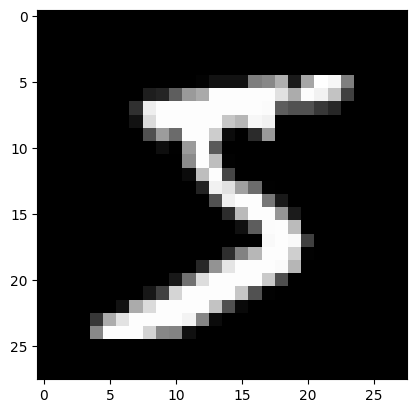

Prediction:  [2]
Label:  2


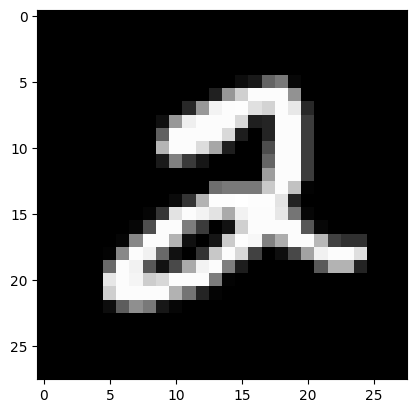

Prediction:  [1]
Label:  1


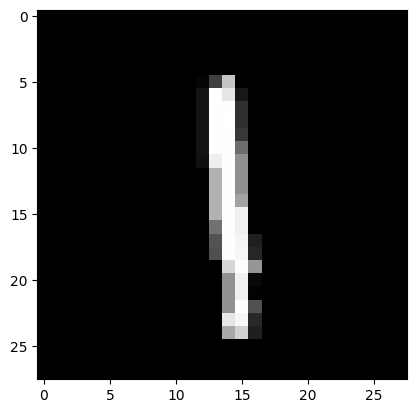

Prediction:  [9]
Label:  9


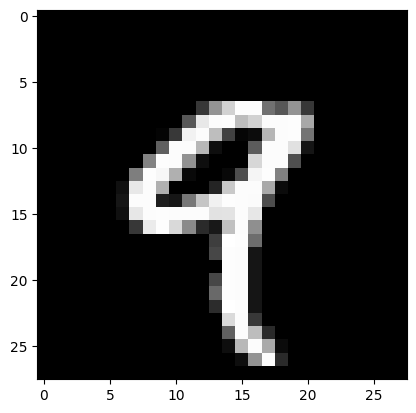

In [ ]:
test_prediction_with_GSF(0, W1, b1, W2, b2, W3 , b3)
test_prediction_with_GSF(5, W1, b1, W2, b2,W3 , b3)
test_prediction_with_GSF(8, W1, b1, W2, b2,W3 , b3)
test_prediction_with_GSF(4, W1, b1, W2, b2,W3 , b3)

In [ ]:
# Initialize parameters and train
alpha = 0.001
iterations = 200
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

W1, b1, W2, b2, W3, b3 = gradient_descent_with_ExLog(X_train, Y_train, alpha, iterations, beta1, beta2, epsilon)

# Evaluate on dev set
dev_predictions = make_predictions_with_ExLog(X_test, W1, b1, W2, b2, W3, b3)
accuracy_ExLog = get_accuracy(dev_predictions, Y_test)
print(f" Accuracy with ExLog: {accuracy_ExLog}")



[3 0 7 ... 3 0 3] [[5 0 4 ... 5 6 8]]
Iteration 10: Accuracy = 0.3662
[3 0 7 ... 3 0 0] [[5 0 4 ... 5 6 8]]
Iteration 20: Accuracy = 0.3252
[3 0 7 ... 8 6 3] [[5 0 4 ... 5 6 8]]
Iteration 30: Accuracy = 0.4957
[3 0 7 ... 8 6 8] [[5 0 4 ... 5 6 8]]
Iteration 40: Accuracy = 0.6731
[3 0 9 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 50: Accuracy = 0.7496
[5 0 9 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 60: Accuracy = 0.8039
[3 0 9 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 70: Accuracy = 0.8414
[3 0 4 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 80: Accuracy = 0.8681
[3 0 4 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 90: Accuracy = 0.8857
[3 0 4 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 100: Accuracy = 0.8952
[3 0 4 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 110: Accuracy = 0.9014
[3 0 4 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 120: Accuracy = 0.9058
[3 0 4 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 130: Accuracy = 0.9104
[3 0 4 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 140: Accuracy = 0.9138
[3 0 4 ... 5 6 

In [ ]:
def test_prediction_with_ExLog(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    # Pass W3 and b3 to make_predictions
    prediction = make_predictions_with_ExLog(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    # Reshape Y_train to be a 1D array or access it with Y_train[0, index] if it's 2D
    label = Y_train[0, index] if Y_train.ndim == 2 else Y_train[index] # Access label assuming Y_train is 2D or 1D
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


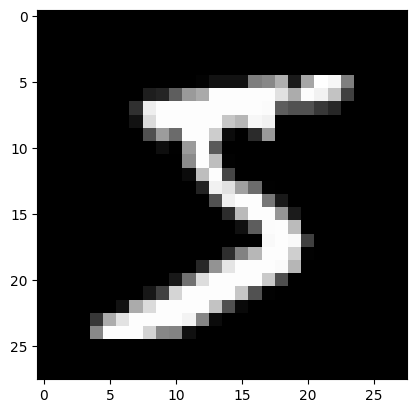

Prediction:  [2]
Label:  2


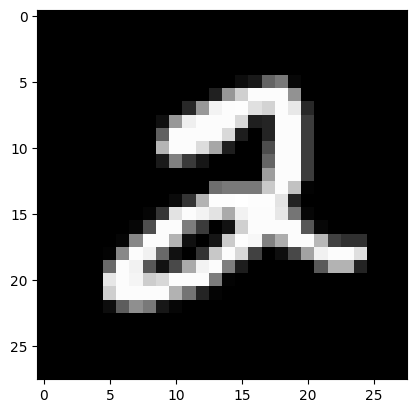

Prediction:  [1]
Label:  1


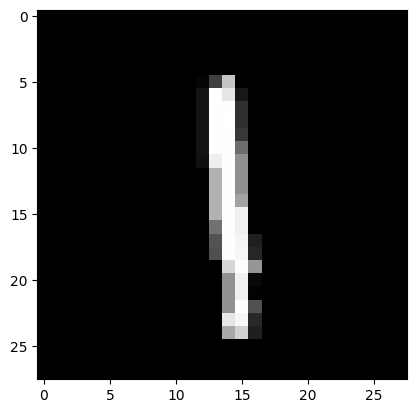

Prediction:  [9]
Label:  9


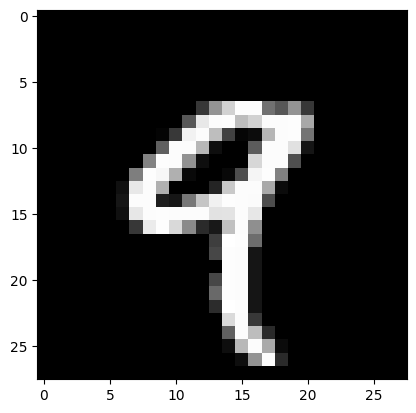

In [ ]:
test_prediction_with_ExLog(0, W1, b1, W2, b2, W3 , b3)
test_prediction_with_ExLog(5, W1, b1, W2, b2,W3 , b3)
test_prediction_with_ExLog(8, W1, b1, W2, b2,W3 , b3)
test_prediction_with_ExLog(4, W1, b1, W2, b2,W3 , b3)

In [ ]:
# Initialize parameters and train
alpha = 0.001
iterations = 200
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

W1, b1, W2, b2, W3, b3 = gradient_descent_with_GELU(X_train, Y_train, alpha, iterations, beta1, beta2, epsilon)

# Evaluate on dev set
dev_predictions = make_predictions_with_GELU(X_test, W1, b1, W2, b2, W3, b3)
accuracy_GELU = get_accuracy(dev_predictions, Y_test)
print(f" Accuracy with GELU: {accuracy_GELU}")



[3 0 4 ... 3 0 3] [[5 0 4 ... 5 6 8]]
Iteration 10: Accuracy = 0.4642
[3 0 4 ... 3 0 3] [[5 0 4 ... 5 6 8]]
Iteration 20: Accuracy = 0.4581
[3 0 4 ... 8 6 8] [[5 0 4 ... 5 6 8]]
Iteration 30: Accuracy = 0.6383
[3 0 9 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 40: Accuracy = 0.7043
[3 0 9 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 50: Accuracy = 0.7610
[3 0 9 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 60: Accuracy = 0.8056
[3 0 9 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 70: Accuracy = 0.8401
[3 0 9 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 80: Accuracy = 0.8673
[3 0 9 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 90: Accuracy = 0.8847
[3 0 4 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 100: Accuracy = 0.8961
[3 0 4 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 110: Accuracy = 0.9042
[3 0 4 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 120: Accuracy = 0.9106
[3 0 4 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 130: Accuracy = 0.9161
[3 0 4 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 140: Accuracy = 0.9216
[3 0 4 ... 5 6 

In [ ]:
def test_prediction_with_GELU(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    # Pass W3 and b3 to make_predictions
    prediction = make_predictions_with_GELU(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    # Reshape Y_train to be a 1D array or access it with Y_train[0, index] if it's 2D
    label = Y_train[0, index] if Y_train.ndim == 2 else Y_train[index] # Access label assuming Y_train is 2D or 1D
    print("Prediction: ", prediction)
    print("Label: ", label)
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  5


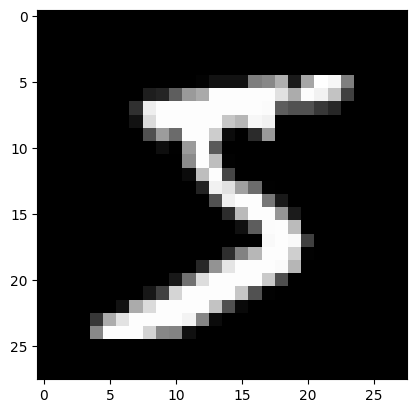

Prediction:  [2]
Label:  2


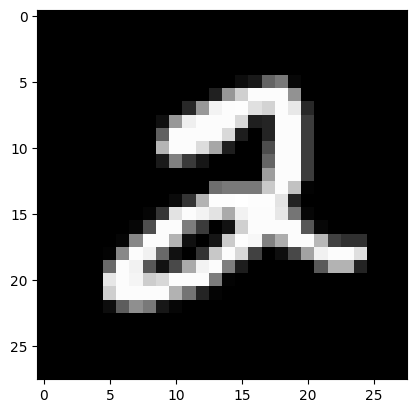

Prediction:  [1]
Label:  1


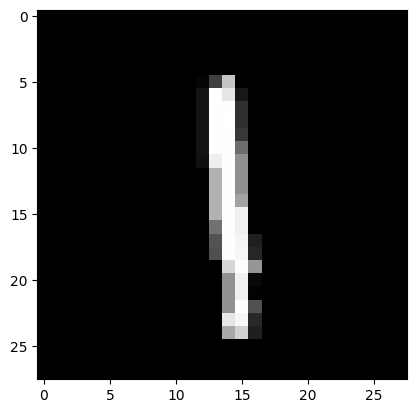

Prediction:  [9]
Label:  9


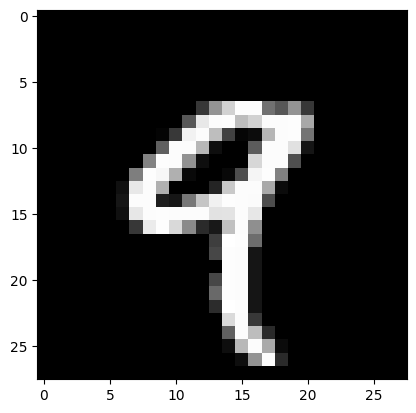

In [ ]:
test_prediction_with_GELU(0, W1, b1, W2, b2, W3 , b3)
test_prediction_with_GELU(5, W1, b1, W2, b2,W3 , b3)
test_prediction_with_GELU(8, W1, b1, W2, b2,W3 , b3)
test_prediction_with_GELU(4, W1, b1, W2, b2,W3 , b3)

In [ ]:
# Initialize parameters and train
alpha = 0.001
iterations = 200
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, alpha, iterations, beta1, beta2, epsilon)

# Evaluate on dev set
dev_predictions = make_predictions(X_test, W1, b1, W2, b2, W3, b3)
accuracy = get_accuracy(dev_predictions, Y_test)
print(f" Accuracy with Leaky ReLU: {accuracy}")



[3 0 7 ... 3 0 3] [[5 0 4 ... 5 6 8]]
Iteration 10: Accuracy = 0.4879
[3 0 7 ... 8 0 0] [[5 0 4 ... 5 6 8]]
Iteration 20: Accuracy = 0.5549
[3 0 9 ... 8 6 8] [[5 0 4 ... 5 6 8]]
Iteration 30: Accuracy = 0.6442
[3 0 4 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 40: Accuracy = 0.7300
[3 0 9 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 50: Accuracy = 0.7895
[3 0 9 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 60: Accuracy = 0.8320
[3 0 9 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 70: Accuracy = 0.8623
[3 0 9 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 80: Accuracy = 0.8805
[3 0 4 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 90: Accuracy = 0.8924
[3 0 4 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 100: Accuracy = 0.9000
[3 0 4 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 110: Accuracy = 0.9056
[3 0 4 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 120: Accuracy = 0.9115
[3 0 4 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 130: Accuracy = 0.9156
[3 0 4 ... 5 6 8] [[5 0 4 ... 5 6 8]]
Iteration 140: Accuracy = 0.9195
[3 0 4 ... 5 6 

In [ ]:

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    # Pass W3 and b3 to make_predictions
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    # Reshape Y_train to be a 1D array or access it with Y_train[0, index] if it's 2D
    label = Y_train[0, index] if Y_train.ndim == 2 else Y_train[index] # Access label assuming Y_train is 2D or 1D
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


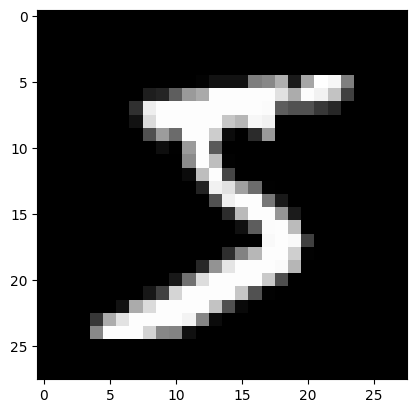

Prediction:  [2]
Label:  2


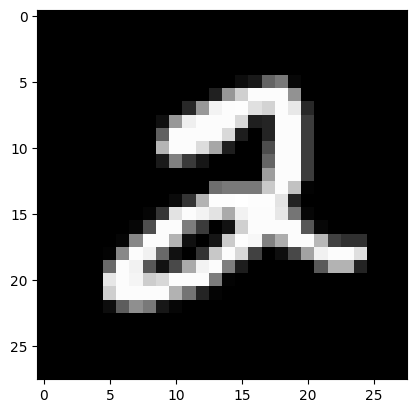

Prediction:  [1]
Label:  1


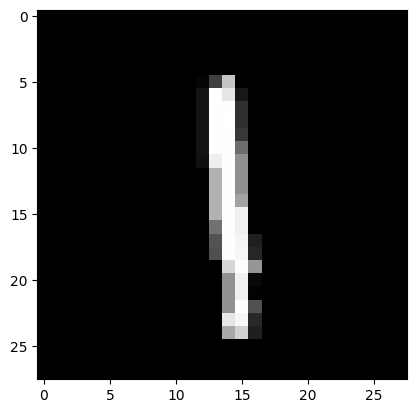

Prediction:  [9]
Label:  9


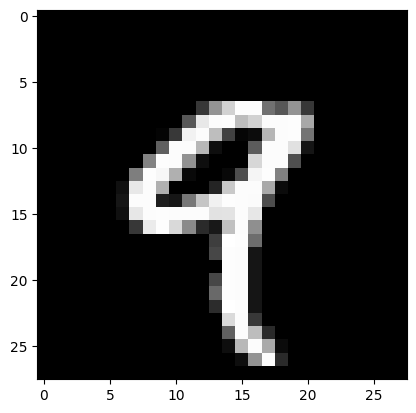

In [ ]:
test_prediction(0, W1, b1, W2, b2, W3 , b3)
test_prediction(5, W1, b1, W2, b2,W3 , b3)
test_prediction(8, W1, b1, W2, b2,W3 , b3)
test_prediction(4, W1, b1, W2, b2,W3 , b3)

In [ ]:
print("\n Activation Function Comparison:")
print(f"GSF Test Accuracy: {accuracy_GSF:.4f}%")
print(f"ExLog Test Accuracy: {accuracy_ExLog:.4f}%")
print(f"GELU Test Accuracy: {accuracy_GELU:.4f}%")
print(f"Leaky relu Test Accuracy: {accuracy:.4f}%")


 Activation Function Comparison:
GSF Test Accuracy: 0.9515%
ExLog Test Accuracy: 0.9257%
GELU Test Accuracy: 0.9375%
Leaky relu Test Accuracy: 0.9350%


In [ ]:
# prompt: export this model

import pickle

# Assuming W1, b1, W2, b2, W3, b3 are defined from your training

model_params = {
    'W1': W1,
    'b1': b1,
    'W2': W2,
    'b2': b2,
    'W3': W3,
    'b3': b3
}


with open('trained_model.pkl', 'wb') as f:
    pickle.dump(model_params, f)

print("Model exported to trained_model.pkl")

Model exported to trained_model.pkl
